In [126]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [128]:
# Load the dataset
df = pd.read_csv(r"C:\Users\meris\Downloads\expanded_nutrition_dataset_1698_rows.csv")

In [130]:
# View basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nDataset Description:")
print(df.describe())
print("\nFirst few rows:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   1698 non-null   int64 
 1   Gender                1698 non-null   object
 2   Height                1698 non-null   int64 
 3   Weight                1698 non-null   int64 
 4   Activity Level        1698 non-null   object
 5   Fitness Goal          1698 non-null   object
 6   Dietary Preference    1698 non-null   object
 7   Daily Calorie Target  1698 non-null   int64 
 8   Protein               1698 non-null   int64 
 9   Carbohydrates         1698 non-null   int64 
 10  Fat                   1698 non-null   int64 
 11  Breakfast Suggestion  1698 non-null   object
 12  Lunch Suggestion      1698 non-null   object
 13  Dinner Suggestion     1698 non-null   object
 14  Snack Suggestion      1698 non-null   object
dtypes: int64(7), obje

In [132]:
# Check for missing values and duplicates
print("\nChecking for missing values:")
print(df.isnull().sum())

print("\nChecking for duplicate rows:")
print(df.duplicated().sum())


Checking for missing values:
Age                     0
Gender                  0
Height                  0
Weight                  0
Activity Level          0
Fitness Goal            0
Dietary Preference      0
Daily Calorie Target    0
Protein                 0
Carbohydrates           0
Fat                     0
Breakfast Suggestion    0
Lunch Suggestion        0
Dinner Suggestion       0
Snack Suggestion        0
dtype: int64

Checking for duplicate rows:
0


In [134]:
# Adding new calculated features
df['Sugar'] = df['Carbohydrates'] * 0.5  # Example calculation for sugar content
df['Sodium'] = df['Protein'] * 0.2  # Example calculation for sodium content
df['Calories'] = df['Fat'] * 9 + df['Protein'] * 4 + df['Carbohydrates'] * 4
df['Fiber'] = df['Carbohydrates'] * 0.12

# Display the updated DataFrame with new features
print("\nUpdated DataFrame with new features:")
print(df.head())


Updated DataFrame with new features:
   Age  Gender  Height  Weight     Activity Level Fitness Goal  \
0   25    Male     180      80  Moderately Active  Weight Loss   
1   32  Female     165      65     Lightly Active  Weight Loss   
2   48    Male     175      95          Sedentary  Maintenance   
3   55  Female     160      70        Very Active  Weight Loss   
4   62    Male     170      85          Sedentary  Maintenance   

  Dietary Preference  Daily Calorie Target  Protein  Carbohydrates  Fat  \
0           Omnivore                  2000      120            250   60   
1         Vegetarian                  1600       80            200   40   
2              Vegan                  2200      100            300   65   
3           Omnivore                  2500      140            350   80   
4         Vegetarian                  2000       80            250   55   

                                Breakfast Suggestion  \
0                      Oatmeal with berries and nuts   
1 

In [136]:
# Define a function to assign diseases based on nutrient criteria
def assign_disease(row):
    diseases = []
    if row['Carbohydrates'] < 150 and row['Sugar'] < 100 and row['Protein'] >= 50:
        diseases.append('Diabetes')
    if row['Sugar'] < 100 and row['Fat'] < 50 and row['Carbohydrates'] < 150:
        diseases.append('Acne')
    if row['Calories'] < 1000 and row['Protein'] > 50 and row['Carbohydrates'] < 150:
        diseases.append('Weight Loss')
    if row['Calories'] > 400 and row['Protein'] > 50 and row['Carbohydrates'] > 120 and row['Fat'] > 30:
        diseases.append('Weight Gain')
    if row['Sodium'] < 50 and row['Fat'] < 50:
        diseases.append('Hypertension')
    if row['Fat'] < 50 and row['Protein'] > 50:
        diseases.append('Heart Disease')
    if row['Protein'] < 80 and row['Sodium'] < 50:
        diseases.append('Kidney Disease')
    if row['Fat'] < 5 and row['Fiber'] > 10:
        diseases.append('Cholesterol')
    
    return ', '.join(diseases) if diseases else 'Normal'

In [138]:
# Apply the function to create a new 'Disease' column
df['Disease'] = df.apply(assign_disease, axis=1)

In [140]:
# View the first few rows to confirm disease assignment
print("\nData with Disease labels:")
print(df[['Carbohydrates', 'Sugar', 'Protein', 'Fat', 'Calories', 'Sodium', 'Fiber', 'Disease']].head())


Data with Disease labels:
   Carbohydrates  Sugar  Protein  Fat  Calories  Sodium  Fiber  \
0            250  125.0      120   60      2020    24.0   30.0   
1            200  100.0       80   40      1480    16.0   24.0   
2            300  150.0      100   65      2185    20.0   36.0   
3            350  175.0      140   80      2680    28.0   42.0   
4            250  125.0       80   55      1815    16.0   30.0   

                                    Disease  
0                               Weight Gain  
1  Weight Gain, Hypertension, Heart Disease  
2                               Weight Gain  
3                               Weight Gain  
4                               Weight Gain  


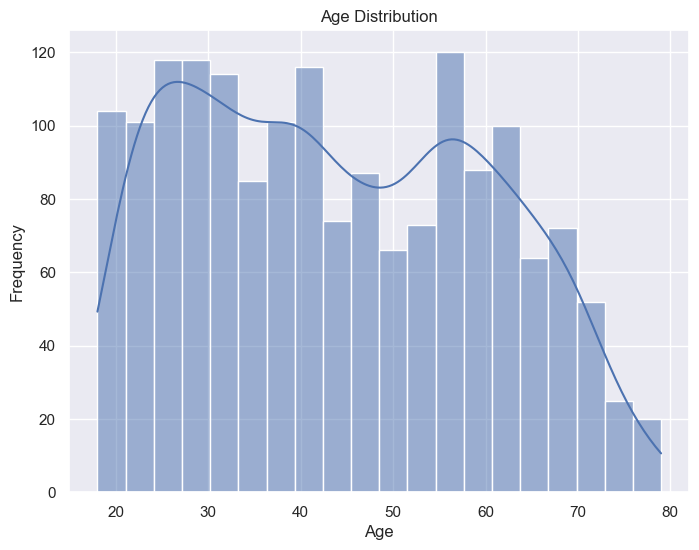

In [142]:
# Set Seaborn style
sns.set()

# Visualize the distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

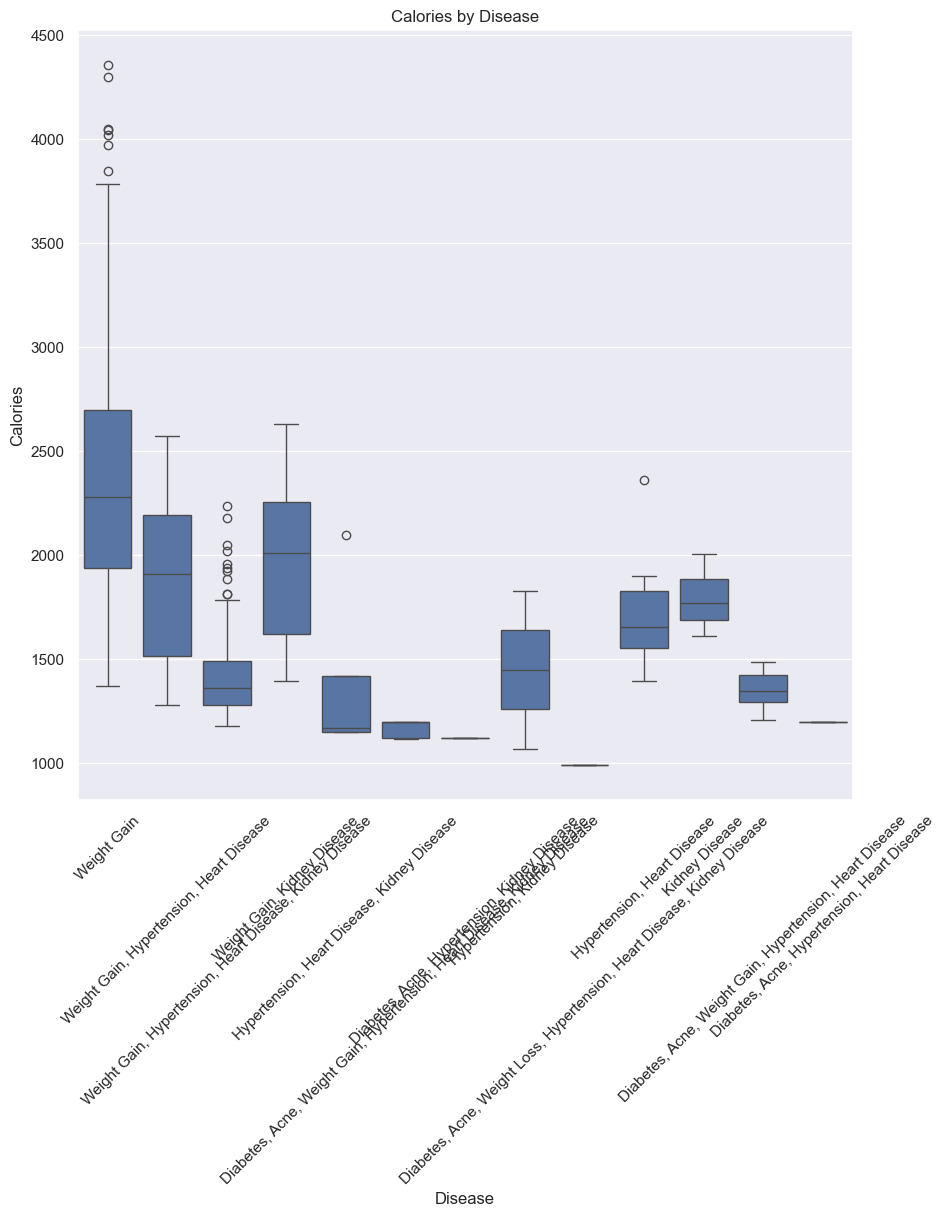

In [144]:
# Visualize the relationship between calorie intake and disease
plt.figure(figsize=(10, 10))
sns.boxplot(x='Disease', y='Calories', data=df)
plt.title('Calories by Disease')
plt.xticks(rotation=45)
plt.show()

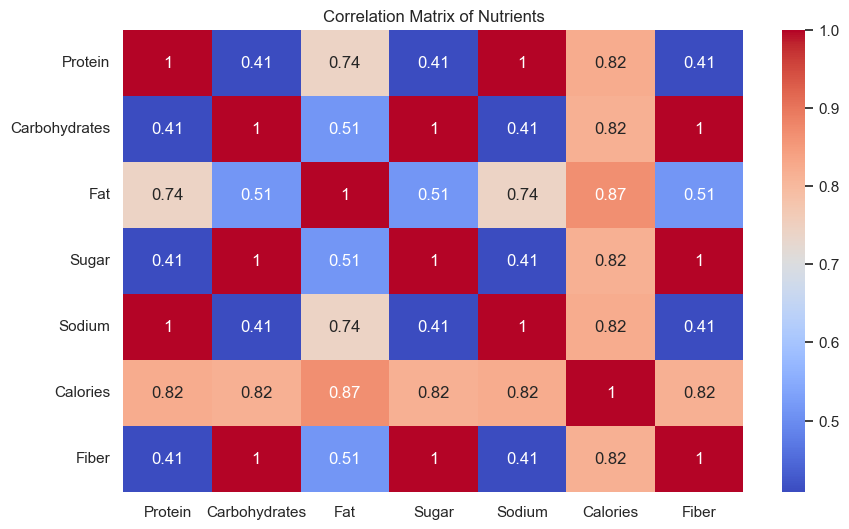

In [146]:
# Correlation heatmap for key nutrients
correlation_matrix = df[['Protein', 'Carbohydrates', 'Fat', 'Sugar', 'Sodium', 'Calories', 'Fiber']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Nutrients')
plt.show()

In [148]:
# Encoding the target variable
label_encoder = LabelEncoder()
df['Disease_encoded'] = label_encoder.fit_transform(df['Disease'])

In [150]:
# Split the dataset into features and target
X = df[['Protein', 'Carbohydrates', 'Fat', 'Sugar', 'Sodium', 'Calories', 'Fiber']]
y = df['Disease_encoded']

In [152]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
# Scale features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [156]:
# Scale features for better model performance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [158]:
# Predictions and evaluation
y_pred = model.predict(X_test)


Accuracy: 0.9970588235294118

Classification Report:
                                                                          precision    recall  f1-score   support

                             Diabetes, Acne, Hypertension, Heart Disease       1.00      1.00      1.00         4
                Diabetes, Acne, Weight Gain, Hypertension, Heart Disease       1.00      1.00      1.00         9
Diabetes, Acne, Weight Gain, Hypertension, Heart Disease, Kidney Disease       1.00      1.00      1.00         2
                                            Hypertension, Kidney Disease       1.00      0.00      0.00         1
                                                             Weight Gain       1.00      1.00      1.00       263
                                Weight Gain, Hypertension, Heart Disease       1.00      1.00      1.00        31
                Weight Gain, Hypertension, Heart Disease, Kidney Disease       0.93      1.00      0.97        14
                                 

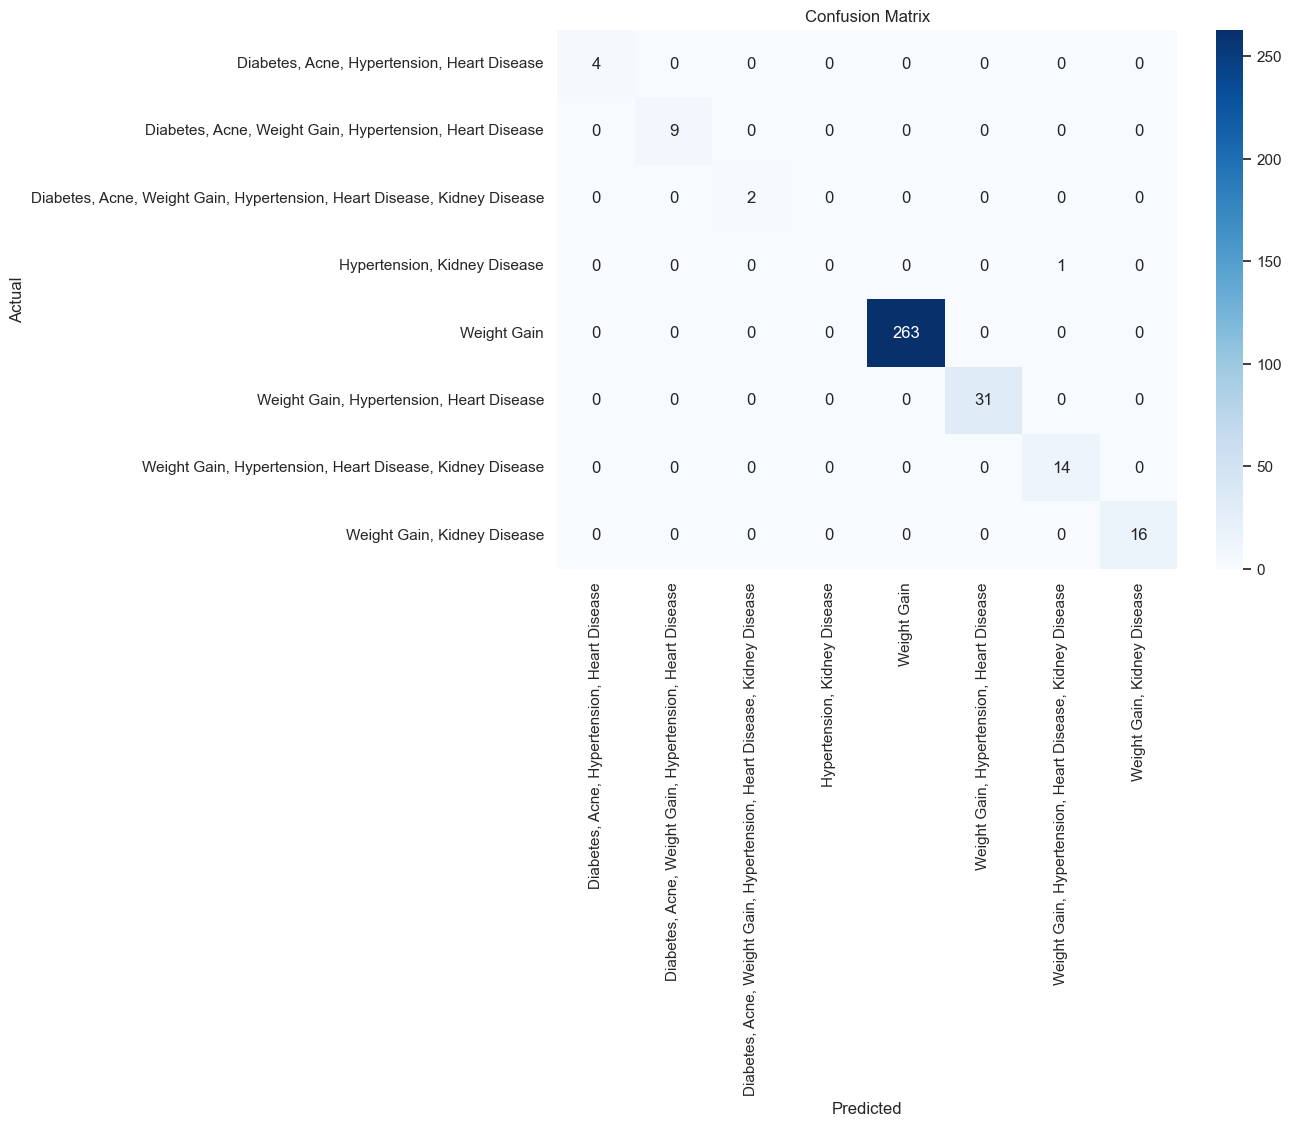

In [160]:
# Print accuracy
# Get the unique classes present in y_test to avoid mismatch
unique_classes_in_test = np.unique(y_test)

# Print accuracy
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=unique_classes_in_test, 
                            target_names=label_encoder.classes_[unique_classes_in_test], 
                            zero_division=1))
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=unique_classes_in_test)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_[unique_classes_in_test],
            yticklabels=label_encoder.classes_[unique_classes_in_test])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [162]:
desired_column_order = [
    'Age', 'Gender', 'Height', 'Weight', 'Activity Level',
    'Dietary Preference', 'Daily Calorie Target', 'Protein', 'Sugar', 'Sodium', 'Calories', 'Carbohydrates', 'Fiber',
    'Fat', 'Breakfast Suggestion', 'Lunch Suggestion', 'Dinner Suggestion',
    'Snack Suggestion', 'Disease'
]

# Ensure all specified columns exist in the DataFrame before reordering
existing_columns = [col for col in desired_column_order if col in df.columns]
df = df.reindex(columns=existing_columns)

# Save the reordered dataset
df.to_csv('expanded_nutrition_dataset_1698_rows.csv', index=False)  # Adjust the file path as needed

# Display the first few rows to confirm
print("\nReordered DataFrame:")
print(df.head())


Reordered DataFrame:
   Age  Gender  Height  Weight     Activity Level Dietary Preference  \
0   25    Male     180      80  Moderately Active           Omnivore   
1   32  Female     165      65     Lightly Active         Vegetarian   
2   48    Male     175      95          Sedentary              Vegan   
3   55  Female     160      70        Very Active           Omnivore   
4   62    Male     170      85          Sedentary         Vegetarian   

   Daily Calorie Target  Protein  Sugar  Sodium  Calories  Carbohydrates  \
0                  2000      120  125.0    24.0      2020            250   
1                  1600       80  100.0    16.0      1480            200   
2                  2200      100  150.0    20.0      2185            300   
3                  2500      140  175.0    28.0      2680            350   
4                  2000       80  125.0    16.0      1815            250   

   Fiber  Fat                               Breakfast Suggestion  \
0   30.0   60       

In [164]:
import pandas as pd
import random
from IPython.display import display

# Load the dataset
nutrition_data = pd.read_csv("expanded_nutrition_dataset_1698_rows.csv")

# Define unique health conditions for individual checkboxes
unique_conditions = ["Weight Loss", "Kidney Disease", "Weight Gain", "Hypertension", "Diabetes", "Acne", "Heart Disease"]

# Function to recommend meals based on input
def recommend_meals(name, age, weight, height, dietary_pref, health_conditions):
    # Step 1: Filter by dietary preference
    filtered_data = nutrition_data[nutrition_data['Dietary Preference'].str.contains(dietary_pref, case=False, na=False)].copy()

    # Debug: Check shape of filtered data
    print("Filtered data shape after dietary preference filtering:", filtered_data.shape)

    # Check if filtered data is empty
    if filtered_data.empty:
        display(f"Hello {name}!")
        display("Unfortunately, we couldn't find a meal plan that matches your dietary preference. Please try different options.")
        return

    # Step 3: Filter further by health conditions (if any are selected)
    if health_conditions:
        health_condition_pattern = '|'.join(health_conditions)
        condition_filtered_data = filtered_data[filtered_data['Disease'].str.contains(health_condition_pattern, case=False, na=False)]

        # Debug: Check shape of condition filtered data
        print("Filtered data shape after health condition filtering:", condition_filtered_data.shape)

        # If there are no exact matches for health conditions, fallback to dietary preference only
        if not condition_filtered_data.empty:
            filtered_data = condition_filtered_data

    # After filtering, check if filtered_data is empty again
    if filtered_data.empty:
        display(f"Hello {name}!")
        display("No meals found matching your health conditions.")
        return

    # Step 4: Choose the closest age and weight from the remaining data
    filtered_data['Age Difference'] = abs(filtered_data['Age'] - age)
    filtered_data['Weight Difference'] = abs(filtered_data['Weight'] - weight)

    # Check if filtered_data is still valid before accessing
    if filtered_data.shape[0] > 0:
        recommended = filtered_data.sort_values(by=['Age Difference', 'Weight Difference']).iloc[0]

        # Calculate BMI
        height_m = height / 100  # Convert cm to meters
        bmi_value = weight / (height_m ** 2)

        # Display personalized greeting, BMI, and meal suggestions
        display(f"Hello {name}!")
        display(f"Your BMI is: {bmi_value:.2f}")

        # BMI-based recommendation
        if bmi_value < 18.5:
            recommendation = "Your BMI is below the normal range. Consider a diet to help with weight gain."
        elif 18.5 <= bmi_value < 24.9:
            recommendation = "Your BMI is within the normal range. Maintain a balanced diet to stay healthy!"
        else:
            recommendation = "Your BMI is above the normal range. Consider a diet plan for weight management."
        display(recommendation)

        specific_diet = "Here's a suggested weekly meal plan based on your preferences and health conditions."
        display(specific_diet)

        # Weekly meal plan - generating random meals for each day
        weekly_plan = pd.DataFrame({
            "Day": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
            "Breakfast": [random.choice(filtered_data["Breakfast Suggestion"].dropna().tolist()) for _ in range(7)],
            "Lunch": [random.choice(filtered_data["Lunch Suggestion"].dropna().tolist()) for _ in range(7)],
            "Dinner": [random.choice(filtered_data["Dinner Suggestion"].dropna().tolist()) for _ in range(7)],
            "Snack": [random.choice(filtered_data["Snack Suggestion"].dropna().tolist()) for _ in range(7)]
        })
        display(weekly_plan)
    else:
        display("No suitable meal found based on your input.")

# Collect user input
name = input("Enter your name: ")
age = int(input("Enter your age: "))
weight = float(input("Enter your weight (kg): "))
height = float(input("Enter your height (cm): "))
dietary_pref = input("Enter your dietary preference: ")
selected_conditions = input("Enter health conditions (comma-separated if multiple): ").split(',')

# Call the recommendation function with the inputs
recommend_meals(name, age, weight, height, dietary_pref, selected_conditions)

Enter your name:  Rishav
Enter your age:  22
Enter your weight (kg):  68
Enter your height (cm):  173
Enter your dietary preference:  Omnivore
Enter health conditions (comma-separated if multiple):  Heart Disease


Filtered data shape after dietary preference filtering: (564, 19)
Filtered data shape after health condition filtering: (62, 19)


'Hello Rishav!'

'Your BMI is: 22.72'

'Your BMI is within the normal range. Maintain a balanced diet to stay healthy!'

"Here's a suggested weekly meal plan based on your preferences and health conditions."

,Day,Breakfast,Lunch,Dinner,Snack
0,Monday,Vegan pancakes with syrup,Quinoa salad with chickpeas and vegetables,Chicken stir-fry with brown rice,Fruit and yogurt
1,Tuesday,Oatmeal with berries,Quinoa salad with chickpeas and vegetables,Turkey chili with brown rice,Fruit and yogurt
2,Wednesday,Smoothie with protein powder,Avocado and chickpea salad,Baked salmon with veggies,Apple with almond butter
3,Thursday,Greek yogurt with granola and fruit,Grilled chicken salad with mixed greens,Tuna salad sandwich on whole-wheat bread,Greek yogurt with fruit
4,Friday,Greek yogurt with granola and fruit,Lentil soup with bread,Lentil and vegetable curry,Trail mix
5,Saturday,Greek yogurt with granola and fruit,Avocado and chickpea salad,Tofu and quinoa bowl,Banana with peanut butter
6,Sunday,Egg and spinach wrap,Avocado and chickpea salad,Lentil and vegetable curry,Protein bar
